In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [3]:
#wait = pd.read_excel("/Users/kexinli/Desktop/Pt1/SimData_WList_Ver2.0.xls")
transplant = pd.read_excel("SimData_Transplant_Ver2.0.xls")
transplant.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,O,inpt,Male,B,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962,0
1,Male,A,home,Male,O,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065,1
2,Female,A,home,Male,A,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200,0
3,Male,O,inpt,Female,B,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556,0
4,Male,O,home,Female,O,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515,0


In [4]:
# feature encoding
t_encoder = LabelEncoder()
t_encoder.fit(transplant['Gender'])
transplant['Gender'] = t_encoder.transform(transplant['Gender'])
t_encoder.fit(transplant['Bloodtype'])
transplant['Bloodtype'] = t_encoder.transform(transplant['Bloodtype'])
t_encoder.fit(transplant['Inpt_attx'])
transplant['Inpt_attx'] = t_encoder.transform(transplant['Inpt_attx'])

In [5]:
from sklearn.preprocessing import Normalizer
transplant.loc[transplant['Time'] < 1825, 'If'] = 0
transplant.loc[transplant['Time'] > 1825, 'If'] = 1
od_array = np.array(transplant['If'])
od_array = od_array.reshape(-1,1)
labels = transplant['If']

In [6]:
transplant.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens,If
0,1,3,2,Male,B,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962,0,1.0
1,1,0,0,Male,O,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065,1,0.0
2,0,0,0,Male,A,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200,0,0.0
3,1,3,2,Female,B,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556,0,0.0
4,1,3,0,Female,O,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515,0,0.0


In [7]:
transplantcorr = transplant.drop(['Time', 'Cens'],axis=1).corr()
transplantcorr.head()

,Gender,Bloodtype,Inpt_attx,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,If
Gender,1.000000,-0.005836,-0.075560,0.030238,0.068145,0.002423,-0.019234,-0.036594,-0.108870,-0.106469,-0.002485
Bloodtype,-0.005836,1.000000,0.018272,0.116696,0.007410,0.026539,-0.041265,-0.002210,0.021212,0.020656,-0.015199
Inpt_attx,-0.075560,0.018272,1.000000,-0.144566,-0.092166,0.002499,0.011932,-0.007031,0.423107,0.392317,-0.009775
Waittime,0.030238,0.116696,-0.144566,1.000000,0.077479,-0.003902,-0.005601,0.007132,-0.166965,-0.165804,-0.031106
Age_Tx,0.068145,0.007410,-0.092166,0.077479,1.000000,0.105817,-0.012673,-0.026084,-0.127789,-0.101532,-0.013012


In [8]:
transcorr = transplant.corr()

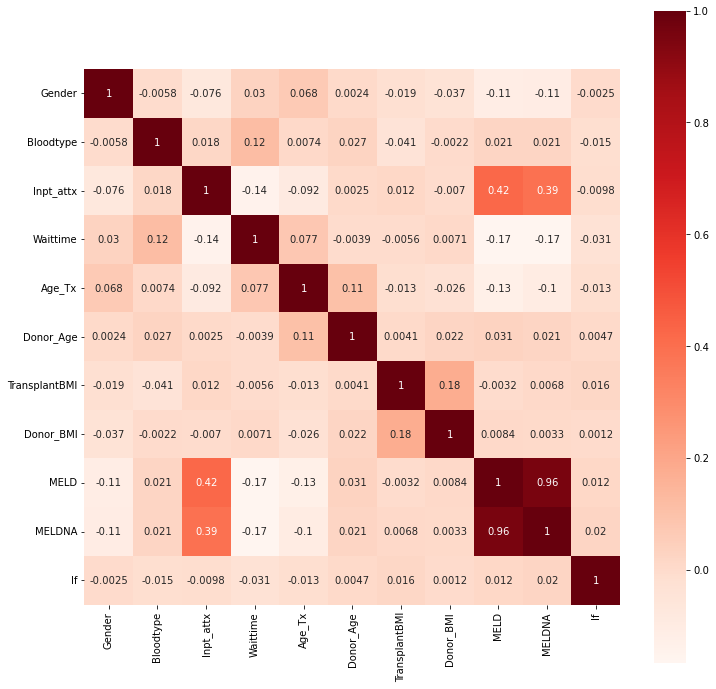

In [9]:
plt.subplots(figsize = (12,12))
# sns.heatmap(transcorr,annot = True,vmax = 1,square = True,cmap = "Reds")
sns.heatmap(transplantcorr,annot = True,vmax = 1,square = True,cmap = "Reds")
plt.show()

In [10]:
transplant.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens,If
0,1,3,2,Male,B,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962,0,1.0
1,1,0,0,Male,O,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065,1,0.0
2,0,0,0,Male,A,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200,0,0.0
3,1,3,2,Female,B,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556,0,0.0
4,1,3,0,Female,O,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515,0,0.0


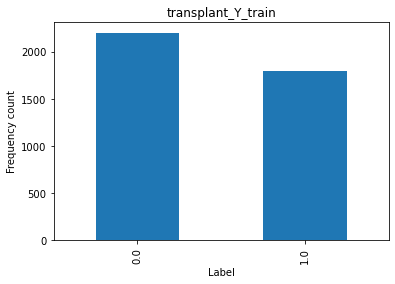

In [11]:
import math
import numpy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
transplant['If'].value_counts().plot.bar()
plt.ylabel('Frequency count')
plt.xlabel('Label');
plt.title('transplant_Y_train')
plt.show()

In [12]:
scaler = Normalizer(norm = 'l2')
transplant = transplant[['Gender','Bloodtype','Inpt_attx','Age_Tx','TransplantBMI', 'Donor_BMI', 'Donor_Age', 'MELD','MELDNA','Time','Cens', 'If']]
transplant = pd.DataFrame(scaler.fit_transform(transplant),columns=['Gender','Bloodtype','Inpt_attx','Age_Tx','TransplantBMI', 'Donor_BMI', 'Donor_Age','MELD','MELDNA','Time','Cens', 'If'])

In [13]:
# so i choose meldna meld and inpt_attx as the predict variables
#wait_X_train = wait.drop(['Cens', 'Time','Gender','MELDNA','Bloodtype','BMI','If'],axis = 1)
transplant_X_train = transplant[['Inpt_attx', 'Age_Tx', 'MELD']]
transplant_X_train.head()


,Inpt_attx,Age_Tx,MELD
0,0.000989,0.026855,0.011347
1,0.000000,0.032907,0.010444
2,0.000000,0.155677,0.058366
3,0.001506,0.021721,0.008566
4,0.000000,0.090716,0.043844


In [14]:
#wait ['If']

In [15]:
transplant_X_train.head()

,Inpt_attx,Age_Tx,MELD
0,0.000989,0.026855,0.011347
1,0.000000,0.032907,0.010444
2,0.000000,0.155677,0.058366
3,0.001506,0.021721,0.008566
4,0.000000,0.090716,0.043844


In [16]:
# Start building machine laerning models
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [17]:
print(transplant_X_train)

      Inpt_attx    Age_Tx      MELD
0      0.000989  0.026855  0.011347
1      0.000000  0.032907  0.010444
2      0.000000  0.155677  0.058366
3      0.001506  0.021721  0.008566
4      0.000000  0.090716  0.043844
...         ...       ...       ...
3995   0.000000  0.025874  0.006607
3996   0.000000  0.023122  0.005056
3997   0.000647  0.013523  0.006176
3998   0.000000  0.020021  0.009215
3999   0.000000  0.005388  0.003131

[4000 rows x 3 columns]


In [18]:
num_clusters = np.arange(2,5)
kmeans_results = {}
for size in num_clusters:
    # training the cluster model
    kmeans = KMeans(n_clusters = size).fit(transplant_X_train)
    # prdict the clusting model
    preds = kmeans.predict(transplant_X_train)
    # evaluate the results
    # kmeans_results[size]["silhouette"] = metrics.silhouette_score(wait_Y_train['Time'], preds, metric='euclidean')
    kmeans_results[size] = metrics.silhouette_score(transplant_X_train, preds, metric='euclidean')
display(kmeans_results)

{2: 0.8254631034752742, 3: 0.7352342266306994, 4: 0.687434565969683}

In [19]:
km = KMeans(2, init='k-means++') # initialize
ypred = km.fit_predict(transplant_X_train)
transplant_X_train['cluster'] = ypred
transplant_X_train = transplant_X_train.to_numpy()
print(transplant_X_train)

[[0.0009893  0.02685538 0.01134722 0.        ]
 [0.         0.03290715 0.01044439 0.        ]
 [0.         0.15567654 0.05836633 0.        ]
 ...
 [0.00064676 0.0135233  0.00617553 0.        ]
 [0.         0.020021   0.00921495 0.        ]
 [0.         0.00538773 0.00313108 0.        ]]


/var/folders/2f/w9xsz0bj377ff7qs7vx2g0mh0000gn/T/ipykernel_2180/3198911802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transplant_X_train['cluster'] = ypred


In [20]:
from copy import deepcopy
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

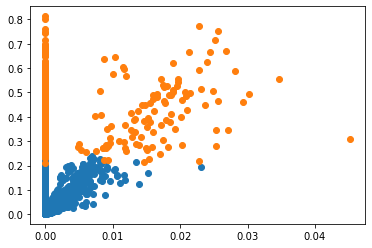

In [21]:
clusters = unique(ypred)
# create scatter plot for samples from each cluster
count = 0
for cluster in clusters:
    # get row indexes for samples with this cluster
    count+=1
    row_ix = where(ypred == cluster)
    # print("Cluster: ",count, "Indexes", row_ix[0])
    # create scatter of these samples
    pyplot.scatter(transplant_X_train[row_ix, 0], transplant_X_train[row_ix, 1])
# show the plot
#print("Total Cluster")
pyplot.show()


In [22]:
transplant_X_train = pd.DataFrame(transplant_X_train)

In [23]:
transplant_X_train.head()

,0,1,2,3
0,0.000989,0.026855,0.011347,0.0
1,0.000000,0.032907,0.010444,0.0
2,0.000000,0.155677,0.058366,0.0
3,0.001506,0.021721,0.008566,0.0
4,0.000000,0.090716,0.043844,0.0


In [24]:
data = transplant.drop(['Cens', 'Time','Gender','MELDNA','Bloodtype','TransplantBMI','If'],axis = 1)
data['cluster'] = ypred
label = pd.DataFrame(labels)

In [25]:
data.head()

,Inpt_attx,Age_Tx,Donor_BMI,Donor_Age,MELD,cluster
0,0.000989,0.026855,0.010570,0.022447,0.011347,0
1,0.000000,0.032907,0.013978,0.033292,0.010444,0
2,0.000000,0.155677,0.061343,0.076337,0.058366,0
3,0.001506,0.021721,0.026653,0.030979,0.008566,0
4,0.000000,0.090716,0.047989,0.080284,0.043844,0


In [26]:
label.head()

,If
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(data, label, train_size=0.7,random_state= 42)

In [28]:
print(X_train)

      Inpt_attx    Age_Tx  Donor_BMI  Donor_Age      MELD  cluster
3215   0.000000  0.045684   0.025846   0.026973  0.004759        0
3126   0.000000  0.247875   0.069831   0.110891  0.100826        1
697    0.000000  0.009031   0.003563   0.010549  0.003448        0
3613   0.000000  0.244991   0.110517   0.291097  0.035341        0
2374   0.000000  0.051974   0.023089   0.047173  0.023898        0
...         ...       ...        ...        ...       ...      ...
1130   0.000000  0.012352   0.006450   0.005338  0.005323        0
1294   0.004383  0.082823   0.070064   0.095023  0.048929        0
860    0.000000  0.014076   0.007330   0.014746  0.002983        0
3507   0.000000  0.020417   0.011385   0.026185  0.009668        0
3174   0.000000  0.014616   0.006381   0.015983  0.002254        0

[2800 rows x 6 columns]


In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [30]:
y_pred1 = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
print('Classification Report \n',classification_report(y_test, y_pred1))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred1))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       656
         1.0       0.96      0.95      0.95       544

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

Accuracy of our mode when applied on test set:  0.9575


In [33]:
print(y_test)

       If
555   0.0
3491  1.0
527   0.0
3925  0.0
2989  0.0
...   ...
3856  1.0
226   0.0
1612  0.0
535   0.0
3848  0.0

[1200 rows x 1 columns]


In [34]:
print(y_pred1)

[0. 1. 0. ... 0. 0. 0.]


In [35]:
## SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 0.01, 10], 'gamma': [10, 0.1, 0.01], 'kernel': ['rbf', 'sigmoid']}

from sklearn.svm import SVC
svc = SVC(C=10, gamma=10)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print('Classification Report \n',classification_report(y_test, y_pred2))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred2))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       656
         1.0       0.96      0.97      0.97       544

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Accuracy of our mode when applied on test set:  0.9683333333333334


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=76)
clf = clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
y_pred = clf.predict(X_test)

In [38]:
print('Classification Report \n',classification_report(y_test, y_pred))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       656
         1.0       0.97      0.97      0.97       544

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Accuracy of our mode when applied on test set:  0.9708333333333333


# BaggingClassifier

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Classification Report \n',classification_report(y_test, y_pred))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       656
         1.0       0.97      0.95      0.96       544

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

Accuracy of our mode when applied on test set:  0.9641666666666666


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print(label)

       If
0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
3995  1.0
3996  1.0
3997  1.0
3998  1.0
3999  1.0

[4000 rows x 1 columns]


In [41]:
print(y_test)

       If
555   0.0
3491  1.0
527   0.0
3925  0.0
2989  0.0
...   ...
3856  1.0
226   0.0
1612  0.0
535   0.0
3848  0.0

[1200 rows x 1 columns]


In [42]:
print(y_pred2)

[0. 1. 0. ... 0. 0. 0.]


In [43]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
estimators = [('svc', SVC(kernel = 'rbf', C=1, gamma=20)), ('Adaboost', AdaBoostClassifier(n_estimators=76)),('Bagging', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5))]



from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Classification Report \n',classification_report(y_test, y_pred))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       656
         1.0       0.96      0.96      0.96       544

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Accuracy of our mode when applied on test set:  0.9658333333333333
